# Kernel Breakdown Demo

In [1]:
from hta.trace_analysis import TraceAnalysis

## Load traces

In [ ]:
trace_dir = "~/github/TraceAnalyzer/hta/tests/data/vision_transformer"
analyzer = TraceAnalysis(trace_dir=trace_dir)

### Kernel Types
Based on major event types we break down the kernels in three main categories. We refer to the following as kernel types.
1. COMPUTATION
1. COMMUNICATION
1. MEMORY (i.e., Memcpy from Device to Host, Host to Device etc.)

### Input

The function takes the following parameters:
- **duration_ratio**: float - a value between 0 and 1 representing the proportion of time taken by top COMM/COMP/MEMORY kernels. Default value = 0.8.
- **num_kernels**: int - number of kernels to show for each category. Default value = 10.
- **include_memory_kernels**: bool - whether to include the IO category or not. Default value = False.
- **visualize**: bool - whether to show the plots or not. Default value = True.
- **image_renderer**: str - image renderer to use. We use plotly to generate the graphs. The plots do not render in a notebook on github with the default rendering engine. Hence, we use "png" in the examples below.

### Output
Dataframes
1. The first dataframe presents the percentage of time spent by each kernel type.
2. The second dataframe presents the min, max, mean, total(sum), time spent by each kernel along with its standard deviation.

Visual Output
- The Venn diagram presents the percentage of time spent by each kernel type.
- The Pie charts show the (COMM / COMP / MEMORY) kernels taking the most time on each rank.
- The Bar plots show the average time taken by the longest kernels across all the ranks. In other words, it is the distribution of average time across the ranks.

__Note: Running the function in a notebook and hovering over the graphs will show relevant information such as kernel name, percentage of time taken by the kernel.__

### Find the top five kernels by time for each kernel type 

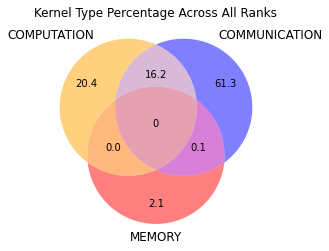

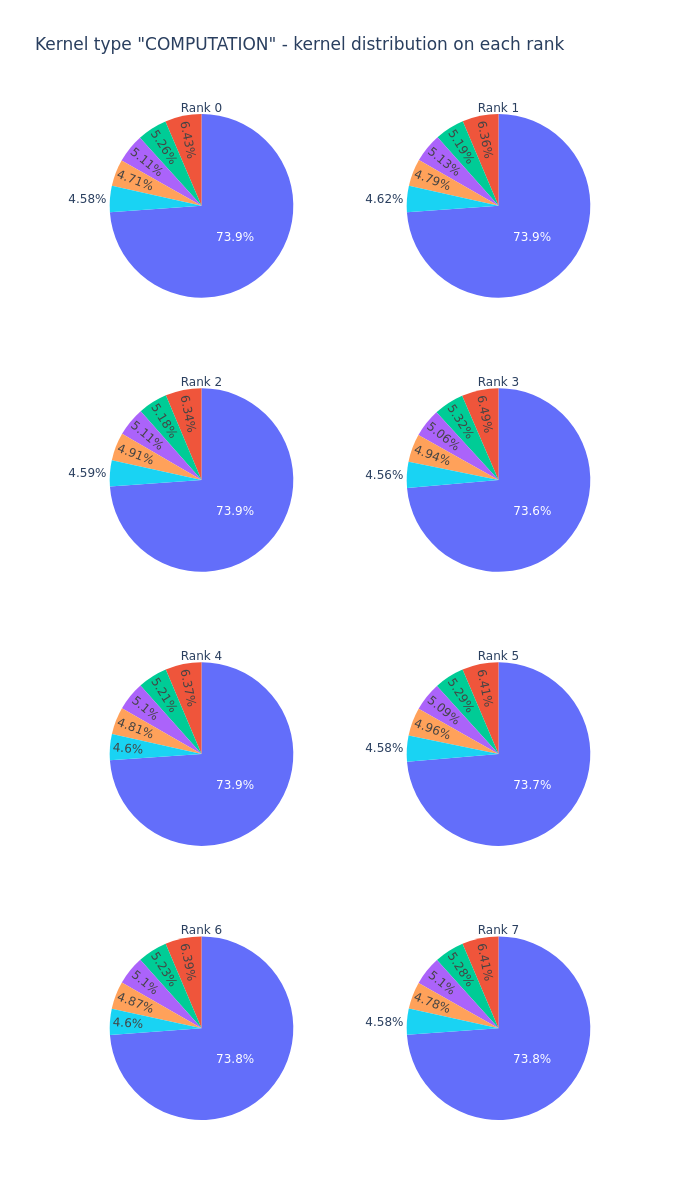

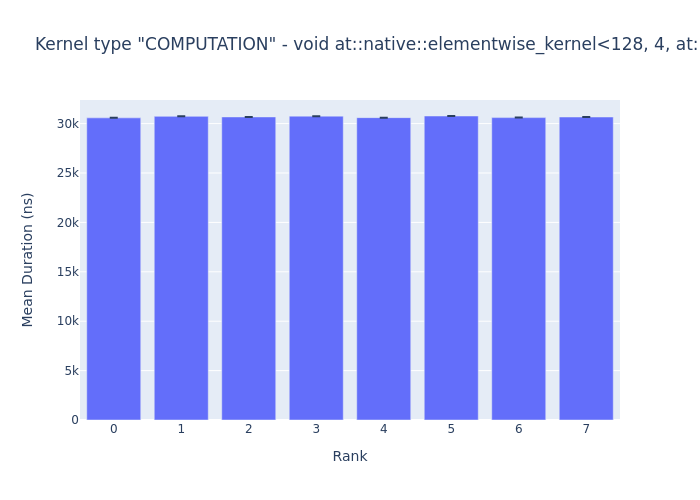

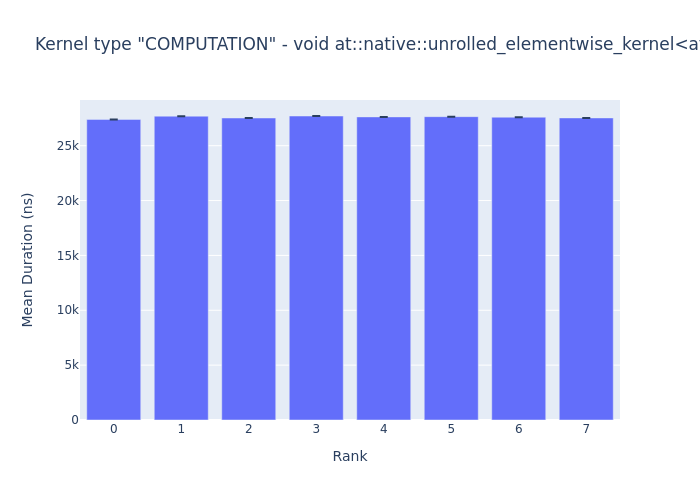

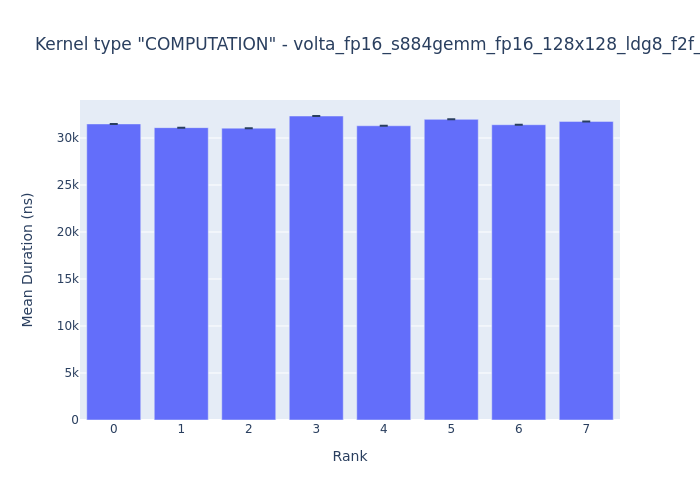

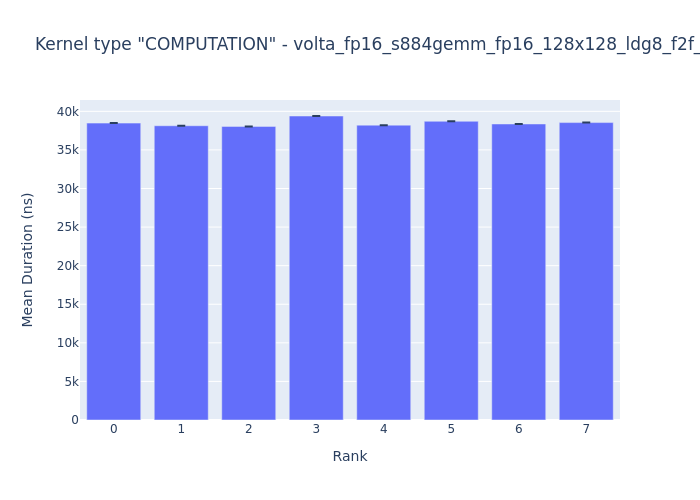

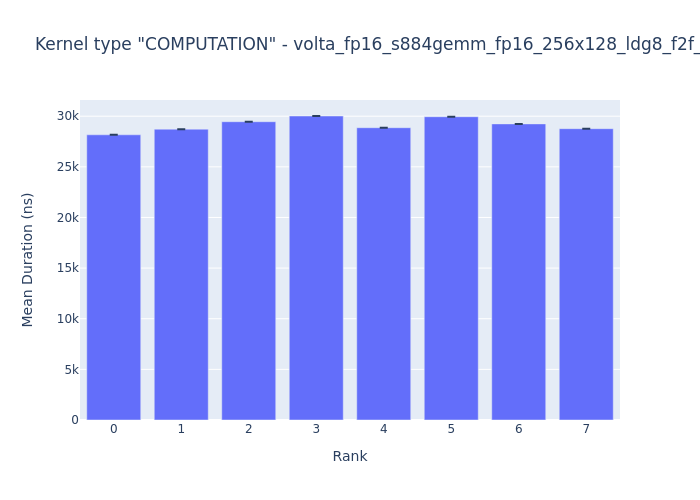

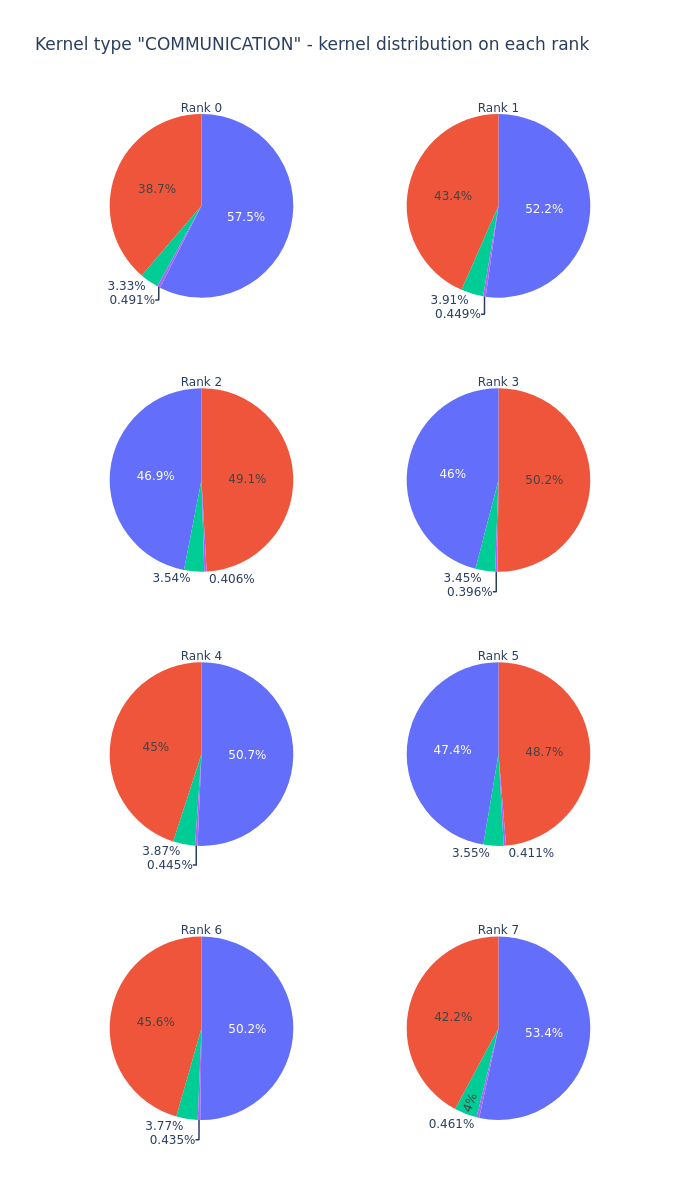

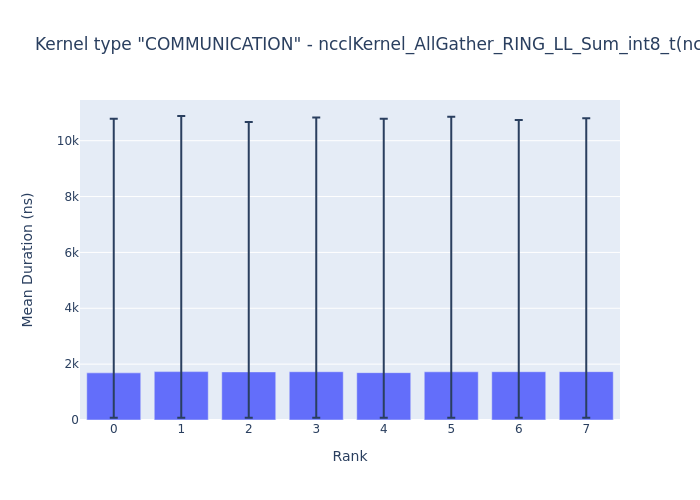

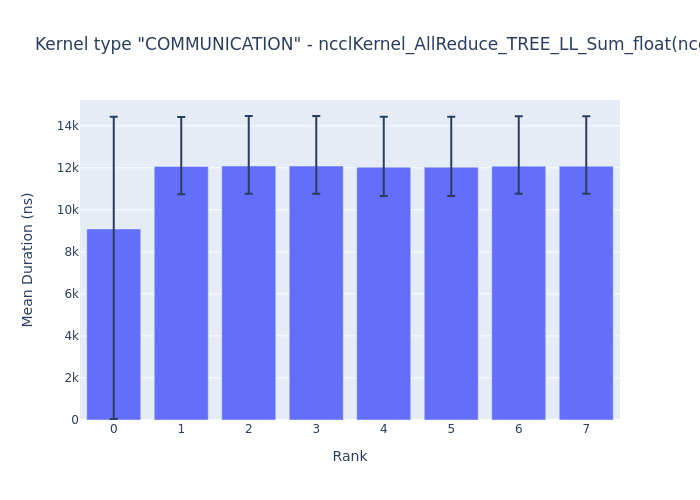

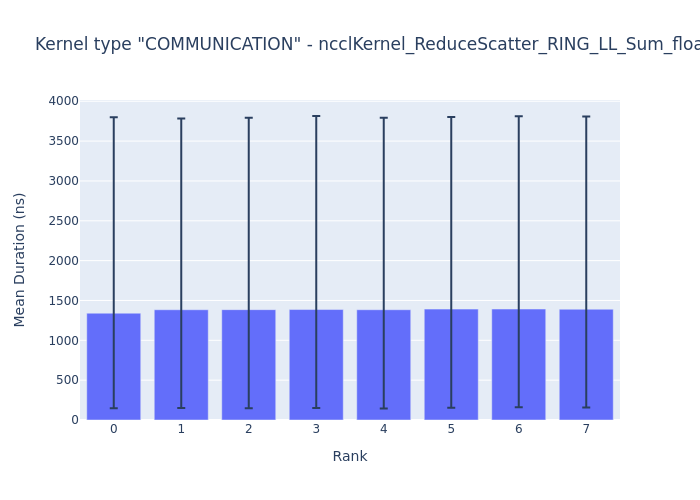

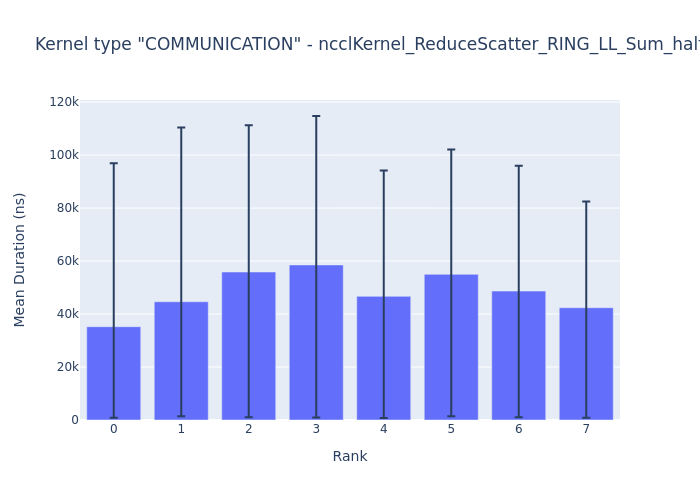

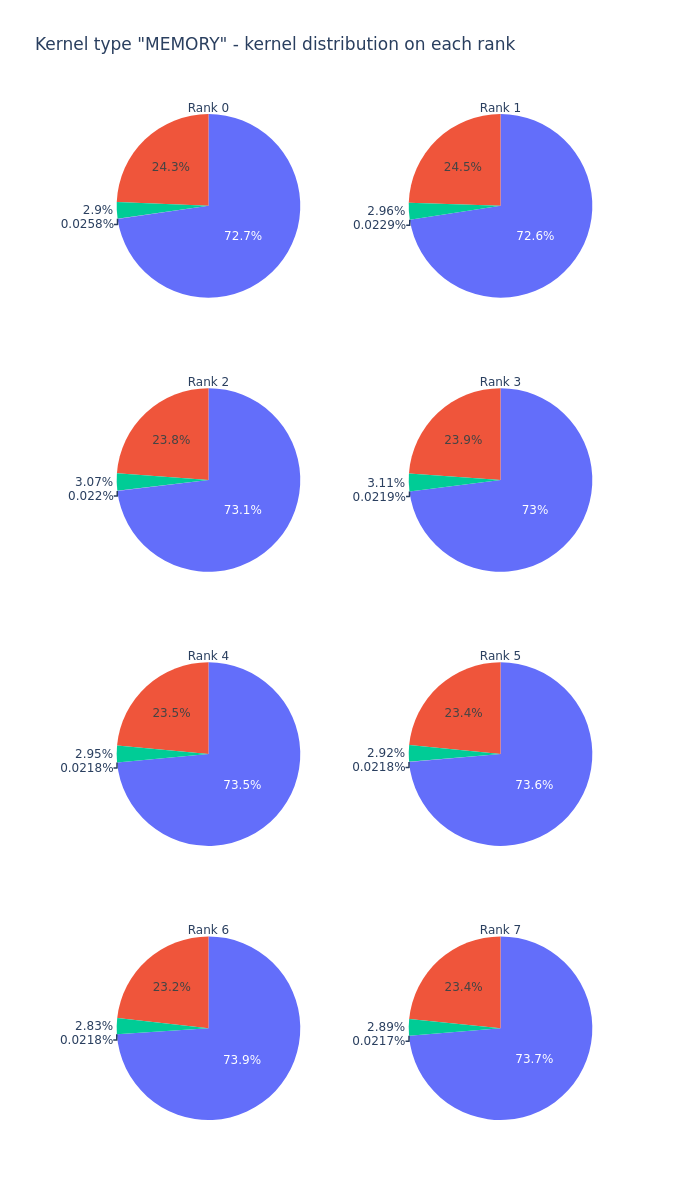

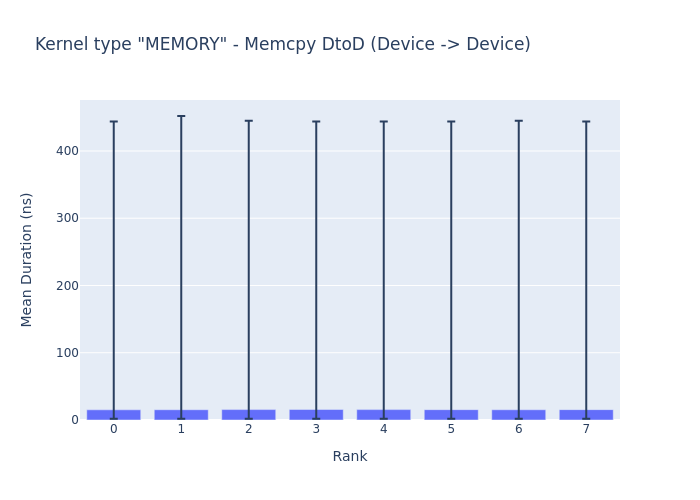

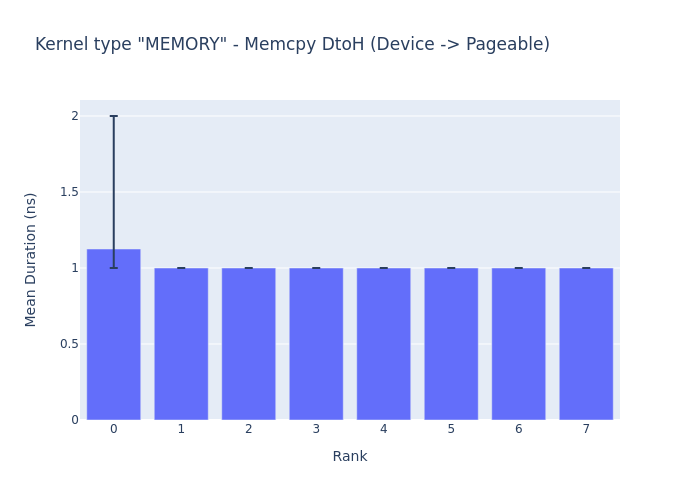

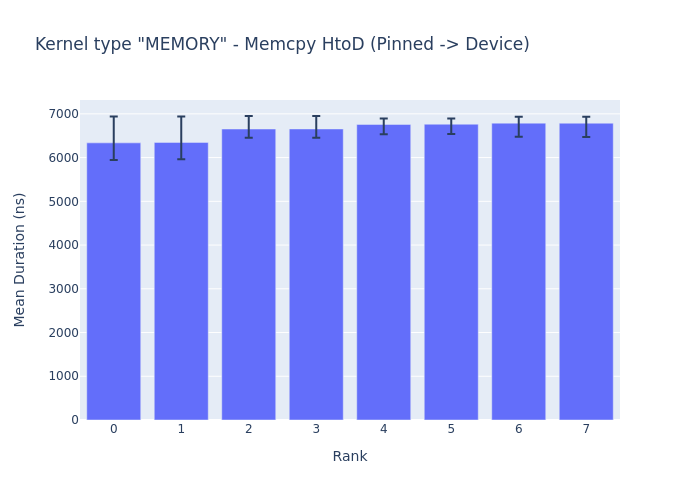

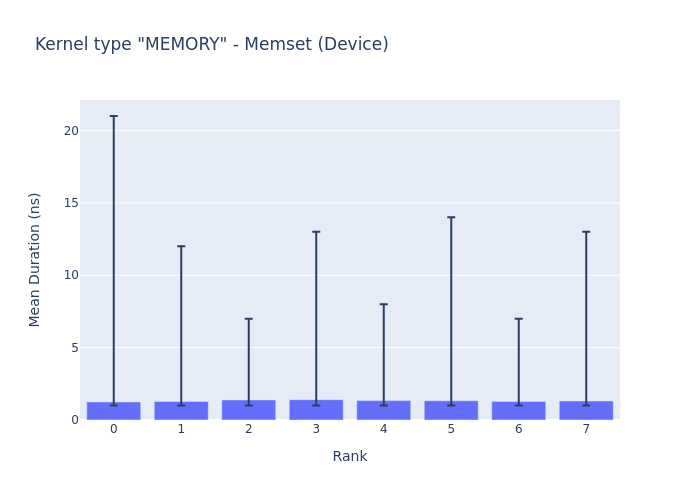

In [3]:
kernel_type_metrics_df, kernel_metrics_df = analyzer.get_gpu_kernel_breakdown( 
                                             num_kernels=5, 
                                             include_memory_kernels=True, 
                                             image_renderer="png")

In [4]:
kernel_type_metrics_df

,kernel_type,sum,percentage
0,COMMUNICATION,8040285,61.3
1,COMPUTATION,2671248,20.4
2,COMPUTATION overlapping COMMUNICATION,2119629,16.2
3,MEMORY,273227,2.1
4,COMMUNICATION overlapping MEMORY,16038,0.1
5,COMPUTATION overlapping MEMORY,564,0.0


In [5]:
kernel_metrics_df

,name,sum (ns),max (ns),min (ns),stddev,mean (ns),kernel_type,rank
0,ncclKernel_AllGather_RING_LL_Sum_int8_t(ncclWo...,627683,10787,83,1651.592760,1687.319892,COMMUNICATION,0
1,ncclKernel_AllGather_RING_LL_Sum_int8_t(ncclWo...,644435,10884,82,1705.334758,1732.352151,COMMUNICATION,1
2,ncclKernel_AllGather_RING_LL_Sum_int8_t(ncclWo...,640631,10665,79,1700.774025,1722.126344,COMMUNICATION,2
3,ncclKernel_AllGather_RING_LL_Sum_int8_t(ncclWo...,643073,10834,81,1727.301230,1728.690860,COMMUNICATION,3
4,ncclKernel_AllGather_RING_LL_Sum_int8_t(ncclWo...,630605,10785,80,1656.166440,1695.174731,COMMUNICATION,4
...,...,...,...,...,...,...,...,...
107,Memset (Device),1134,13,1,0.807700,1.403465,MEMORY,3
108,Memset (Device),1084,8,1,0.739841,1.341584,MEMORY,4
109,Memset (Device),1073,14,1,0.818079,1.327970,MEMORY,5
110,Memset (Device),1038,7,1,0.693866,1.284653,MEMORY,6
